In [63]:
import pandas as pd
import random as rnd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pandas.tseries.offsets import DateOffset
from matplotlib.pyplot import figure


%matplotlib inline

In [25]:
df = pd.read_csv('../datasets/weather/jp_weather.csv',decimal=",")
df = df.drop('Value', axis = 1)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=["Date"])
df['Celsius'] = pd.to_numeric(df['Celsius'])
df['Celsius'] = df['Celsius'].round(2)


In [26]:
df_tokyo_all = df[df['Station']=='TOKYO INTL']
df_tokyo_all.index = pd.to_datetime(df_tokyo_all['Date'])
df_tokyo_all = df_tokyo_all.loc[:,['Date','Celsius']]
tokyo_all_temp = df_tokyo_all['Celsius'] #June 13rd 2018 to March 21st 2021 
y = tokyo_all_temp

In [27]:
y

Date
2018-06-13    21.94
2018-06-14    20.56
2018-06-15    17.22
2018-06-16    16.72
2018-06-17    20.06
              ...  
2021-03-17    13.11
2021-03-18    12.94
2021-03-19    13.11
2021-03-20    15.61
2021-03-21    17.11
Name: Celsius, Length: 1000, dtype: float64

In [64]:
x = y.index

points = 12
names = []
for i in range(points):
  names.append("a"+str(i))
ds = []
target = []
for i in range(points,len(x)-1):
  ds.append(y[i-points:i])
  target.append(y[i]) 
df = pd.DataFrame(np.array(ds),columns=names) 
dfy = df 
dfy["target"] = target

In [85]:
dfy.head(13)

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,target
0,21.94,20.56,17.22,16.72,20.06,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00
1,20.56,17.22,16.72,20.06,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94
2,17.22,16.72,20.06,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78
3,16.72,20.06,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78
4,20.06,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28
5,20.50,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28,27.56
6,23.06,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28,27.56,27.50
7,20.72,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28,27.56,27.50,28.11
8,22.28,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28,27.56,27.50,28.11,27.44
9,23.44,20.67,23.17,26.00,25.94,27.78,26.78,27.28,27.56,27.50,28.11,27.44,27.67


Text(0, 0.5, 'Temperature (Celsius)')

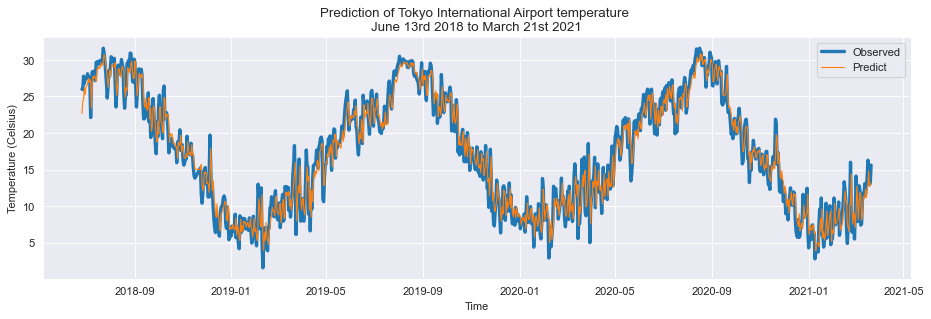

In [93]:
from sklearn.linear_model import LinearRegression
figure(figsize=(14, 4), dpi=80)

model = LinearRegression()
results = model.fit(dfy[names],dfy["target"])
y_pred = model.predict(dfy[names])
plt.plot(x[13:], df["target"], label='Observed', linewidth=3)
plt.plot(x[13:], y_pred, label='Predict', linewidth=1)
plt.legend()
plt.title('Prediction of Tokyo International Airport temperature \nJune 13rd 2018 to March 21st 2021')
plt.xlabel('Time')
plt.ylabel('Temperature (Celsius)')

In [107]:
results.coef_

array([-0.0061781 ,  0.02670768, -0.00128852,  0.0335906 ,  0.06015497,
       -0.0102625 ,  0.10248401,  0.02078935,  0.03947344,  0.05001801,
       -0.0566136 ,  0.72665677])

In [96]:
results.intercept_

0.22984828659724954

In [97]:
dfy[names].shape

(987, 12)

In [98]:
dfy["target"].shape

(987,)